In [1]:
import bempp.api
import numpy as np

bempp.api.global_parameters.assembly.boundary_operator_assembly_type = 'dense'

In [2]:
hvec = np.linspace(0.08, 0.2, 15)
# hvec = [0.2, 0.18, 0.16, 0.14, 0.12, 0.1, 0.08]
# k_ext = 1
k = 1.5

In [3]:
e_error = []
m_error = []


In [4]:
def plane_wave_e(x, n, d, res):
    val =  np.array([np.exp(1j * k * x[2]), 0, 0])
    res[:] = np.cross(val, n)
    
def plane_wave_m(x, n, d, res):
    val = np.array([0, 1., 0]) * np.exp(1j * k * x[2])
    res[:] = np.cross(val, n)

In [5]:
for h in hvec:
    grid = bempp.api.shapes.cube(h=h)
    multitrace = bempp.api.operators.boundary.maxwell.multitrace_operator(grid, k)
    ident = bempp.api.operators.boundary.sparse.multitrace_identity(grid, spaces='maxwell')
    calderon = .5 * ident + multitrace

    e = bempp.api.GridFunction(calderon.domain_spaces[0], 
                               dual_space=calderon.dual_to_range_spaces[0], fun=plane_wave_e)
    m = bempp.api.GridFunction(calderon.domain_spaces[1], 
                               dual_space=calderon.dual_to_range_spaces[1], fun=plane_wave_m)
    
    dof_count = calderon.domain_spaces[0].global_dof_count

    # Compute the error between C and C**2
    r1 = calderon * [e, m]
    r2 = calderon * r1
    electric_error = (r2[0] - r1[0]).l2_norm() / r1[0].l2_norm()
    magnetic_error = (r2[1] - r1[1]).l2_norm() / r1[1].l2_norm()
    e_error.append(electric_error)
    m_error.append(magnetic_error)
    
    print('Mesh size: {0}'.format(h))
    print('Degrees of freedom: {0}'.format(dof_count))
    print("Electric error: {0}".format(electric_error))
    print("Magnetic error: {0}".format(magnetic_error))

Mesh size: 0.08
Degrees of freedom: 3684
Electric error: 0.002459933982021631
Magnetic error: 0.0018162544567359691
Mesh size: 0.08857142857142858
Degrees of freedom: 3108
Electric error: 0.0024459112874477148
Magnetic error: 0.0017362899091909571
Mesh size: 0.09714285714285714
Degrees of freedom: 2652
Electric error: 0.002664488956701126
Magnetic error: 0.0018036503414185872
Mesh size: 0.10571428571428572
Degrees of freedom: 2196
Electric error: 0.002592075233768443
Magnetic error: 0.0018820828355021846
Mesh size: 0.1142857142857143
Degrees of freedom: 1794
Electric error: 0.0026488235852933665
Magnetic error: 0.002059759415369951
Mesh size: 0.12285714285714286
Degrees of freedom: 1794
Electric error: 0.002650468407368996
Magnetic error: 0.002059608441769945
Mesh size: 0.13142857142857145
Degrees of freedom: 1464
Electric error: 0.00345131064005641
Magnetic error: 0.0022727635882684614
Mesh size: 0.14
Degrees of freedom: 1467
Electric error: 0.0034729431410662256
Magnetic error: 0.002

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

In [8]:
slope_e, intercept_e = np.polyfit(np.log(hvec), np.log(e_error), 1)
slope_m, intercept_m = np.polyfit(np.log(hvec), np.log(m_error), 1)

print("Order of electric error: {0}".format(slope_e))
print("Order of magnetic error: {0}".format(slope_m))

Order of electric error: 0.369463810466398
Order of magnetic error: 0.38010698367269435


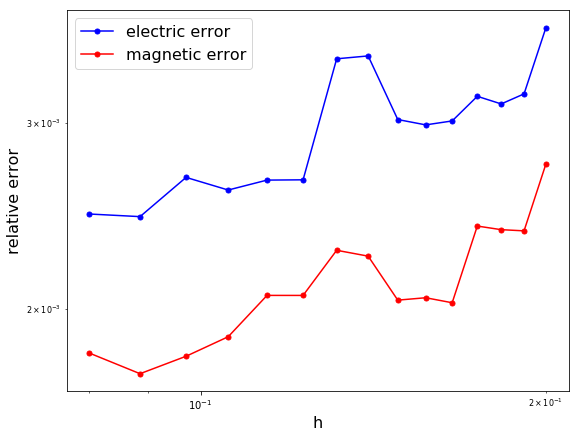

In [9]:
plt.figure(figsize=(9,7))
plt.loglog(hvec, e_error, 'b.-', markersize=10)
plt.loglog(hvec, m_error, 'r.-', markersize=10)
plt.legend(["electric error", "magnetic error"],fontsize = 16)

plt.xlabel('h', fontsize = 16)
plt.ylabel('relative error', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
